# Generate Neuro Volume
Use this notebook to generate a VDB volume from a `n.ii` brain scan file.
VDB output is set to `/output`

In [1]:
import os
import nibabel as nib
import pylab as plt
import numpy as np
from nibabel.testing import data_path

from functions import normalize_array, show_3D_array, view_sagittal_slices, parent_directory

First, we will read in our MRI data, stored in a `.nii` file<br>
The `nibabel` library will read the data in as a **nibabel image object**, which contains:<br>
- **The 3D or 4D Image data array**
- **The Affine Array, which tells you the position of the image data in a reference space**
- **Image Metadata, usually in the form of an image header**

We then create a 3D tensor, which is normalized to 0.0-1.0 for VDB creation

In [2]:
parent_directory = parent_directory()
input_filepath = os.path.join(parent_directory, "media/sub-1001_T1w.nii")
output_folder = os.path.join(parent_directory, "output/")

brain_file = os.path.join(data_path, input_filepath)
brain_img = nib.load(brain_file) #the nibabel image
brain_tensor = brain_img.get_fdata()
normalized_brain_tensor = np.array(normalize_array(brain_tensor)) #Tensors for VDB must be normalized to 0.0-1.0

The following function loops through each "slice" in the 3D array and adds it to a numpy array.<br>
Note: Doesn't this feel redundant?

In [3]:
# Function Exposed for Demonstration Purposes

def create_volume(normalized_tensor):
    mri_volume = np.zeros(normalized_tensor.shape)
    for z_index in range(normalized_tensor.shape[2]):
        sagittal_slice = normalized_tensor[:, :, z_index]
        for row_index, row in enumerate(sagittal_slice):
            for col_index, _ in enumerate(row):
                density = sagittal_slice[row_index][col_index]
                mri_volume[row_index][col_index][z_index] = density
    return mri_volume


output_brain_volume = create_volume(normalized_brain_tensor)

We can perform a sanity check by viewing this array in 3D, as well as the sagittal slices of the MRI.<br>
We can think of the above function as taking the first output (this long list of 2D images), and stacking in in 3D space to create the second output (the 3D view)

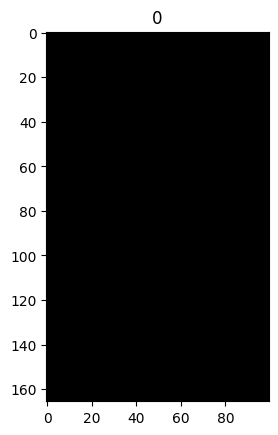

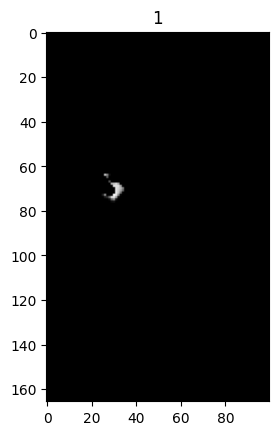

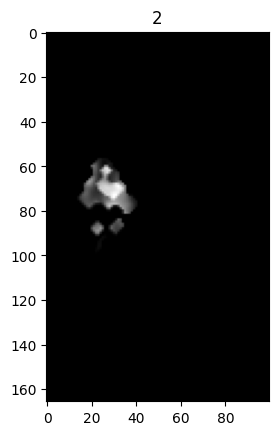

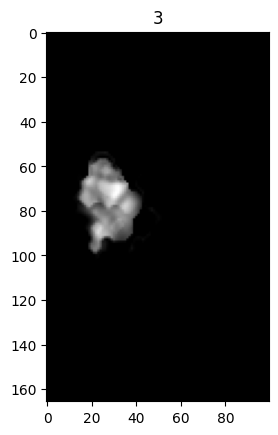

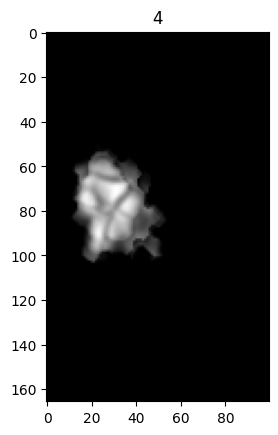

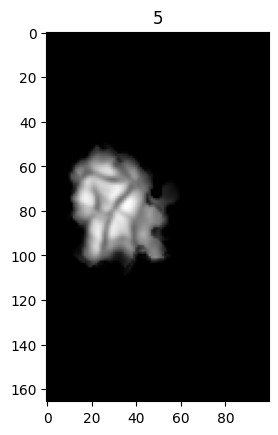

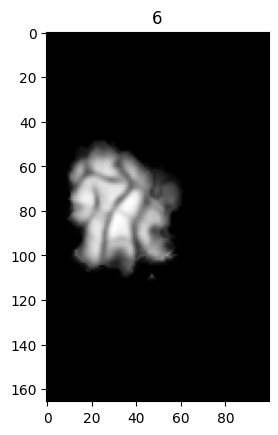

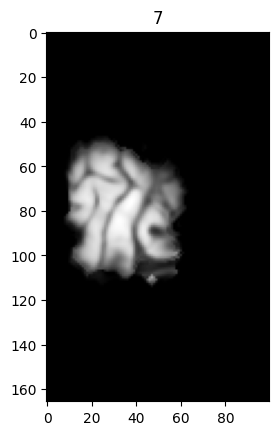

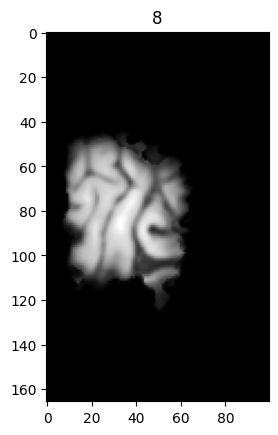

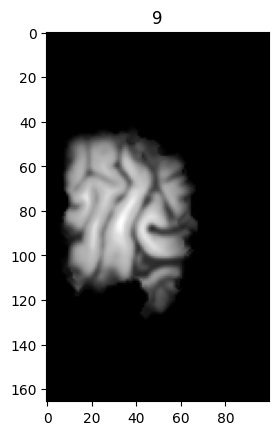

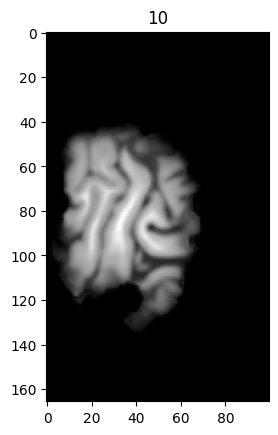

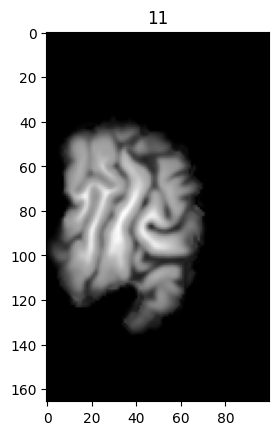

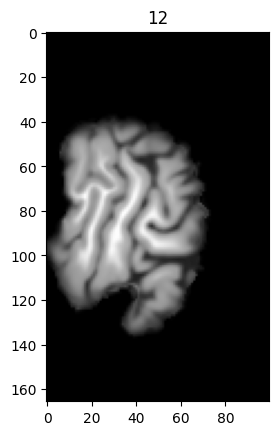

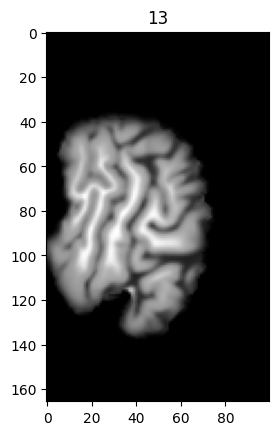

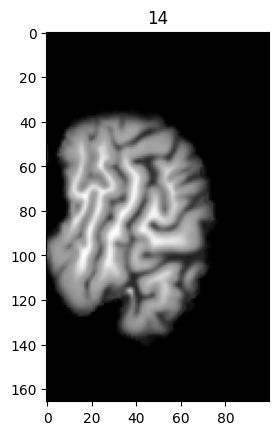

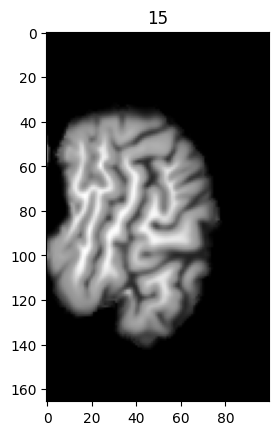

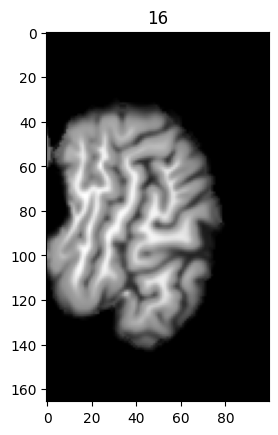

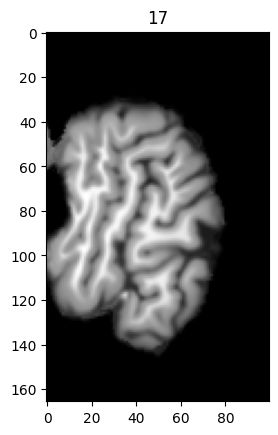

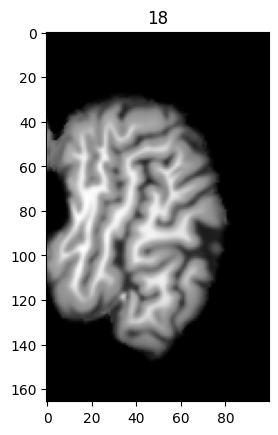

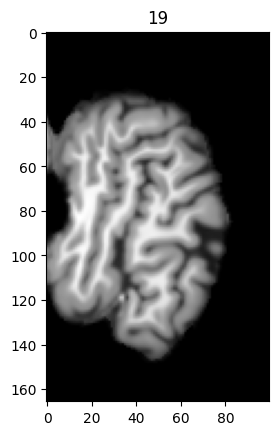

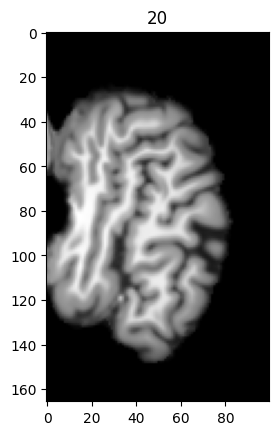

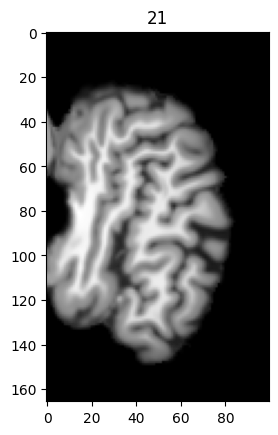

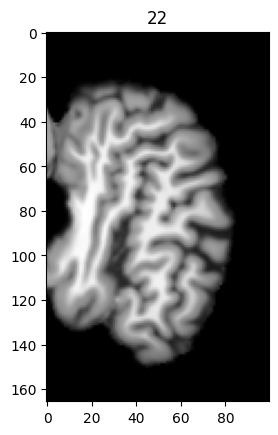

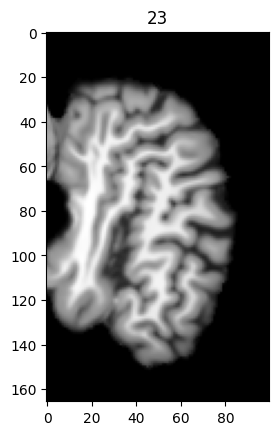

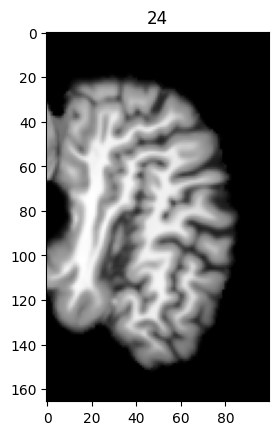

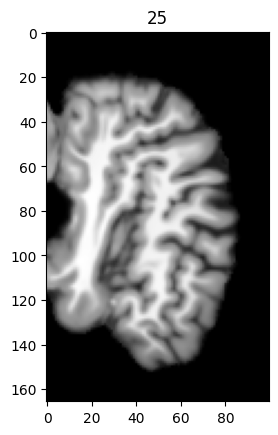

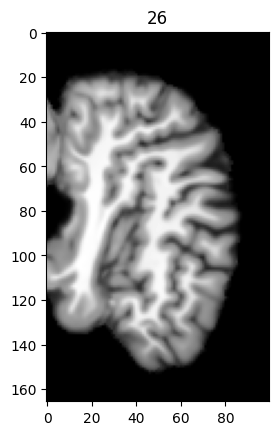

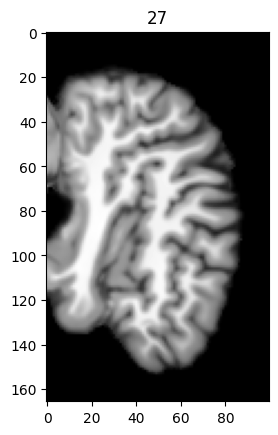

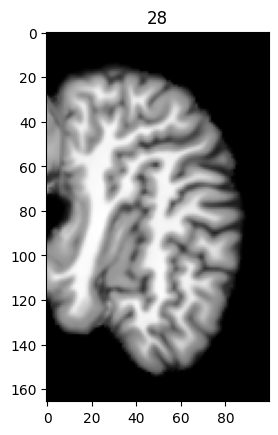

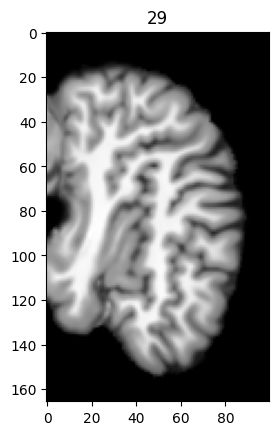

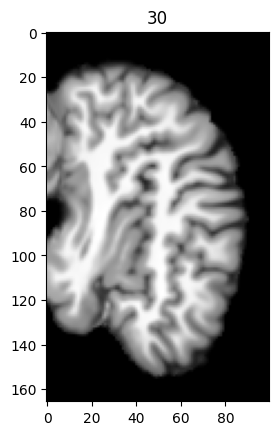

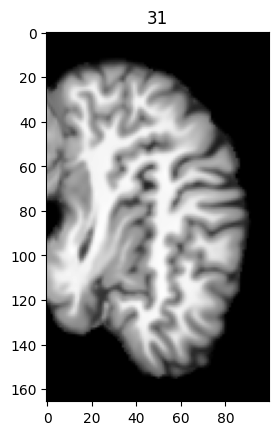

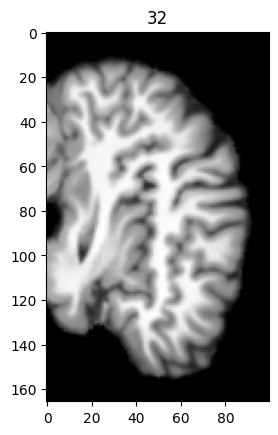

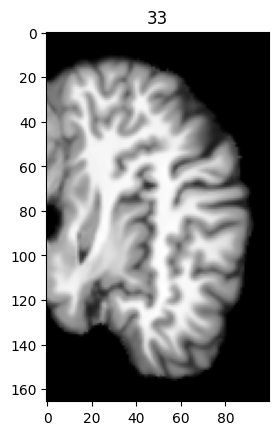

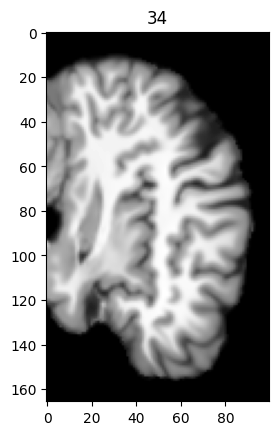

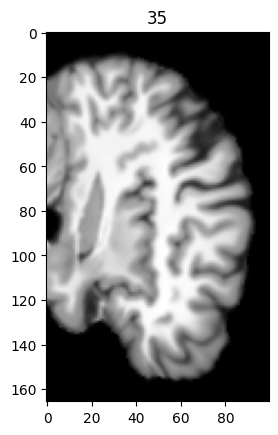

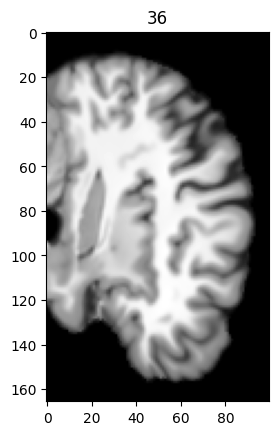

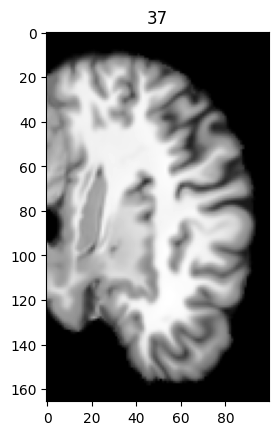

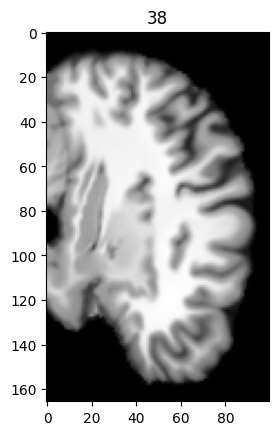

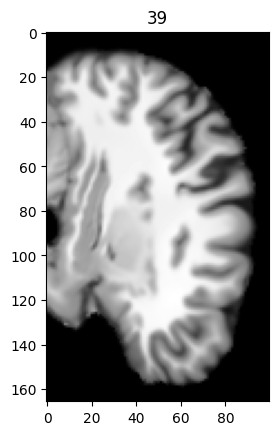

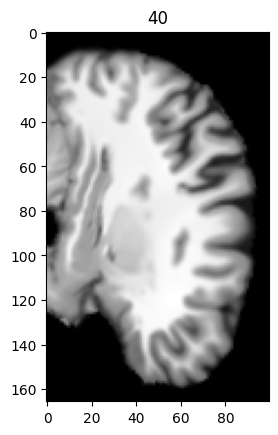

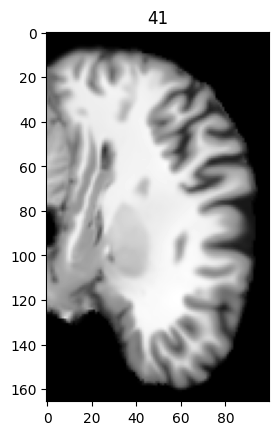

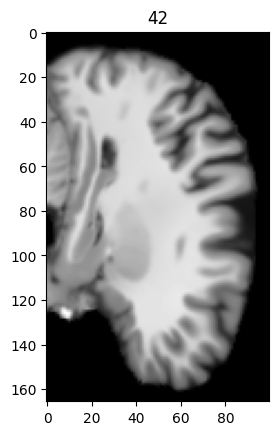

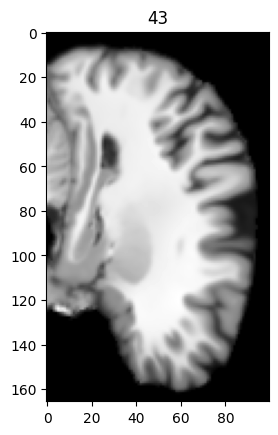

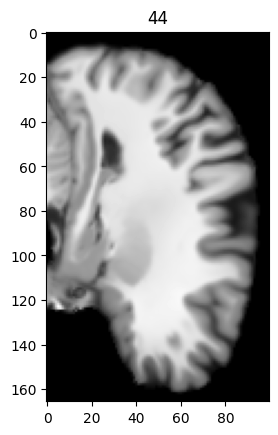

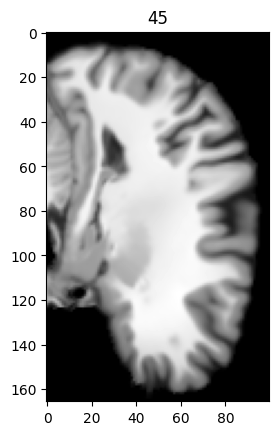

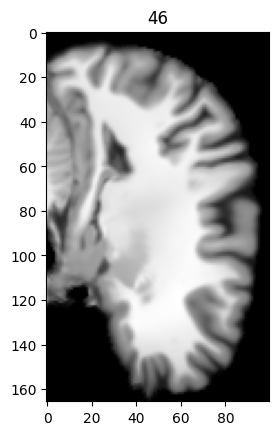

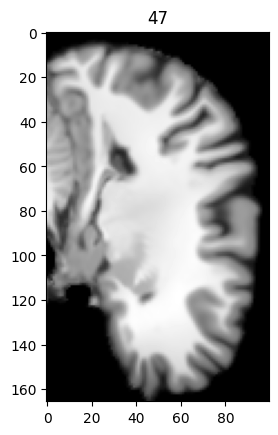

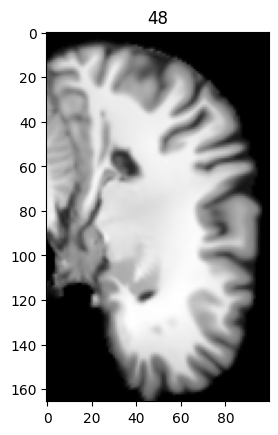

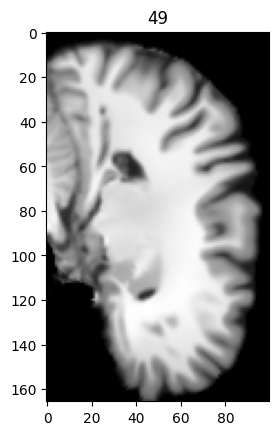

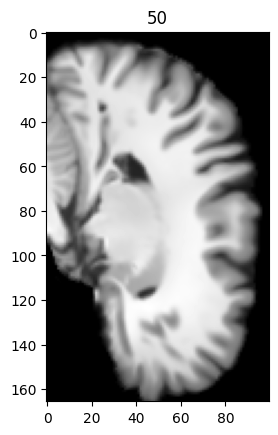

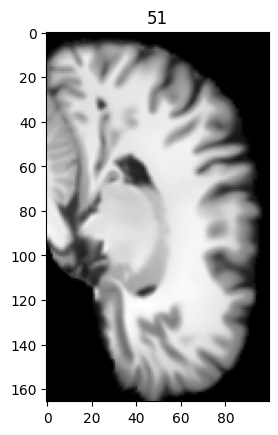

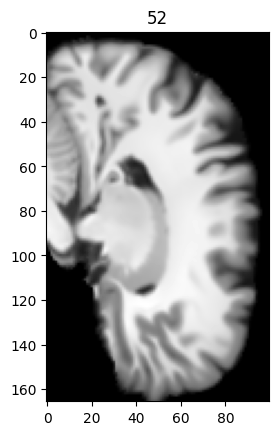

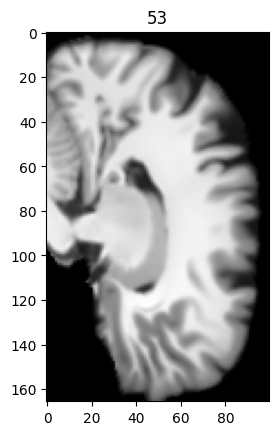

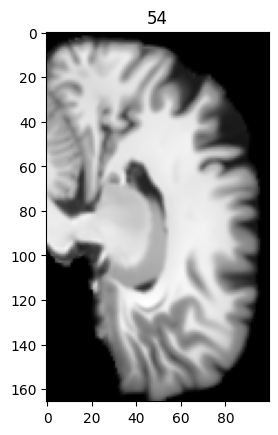

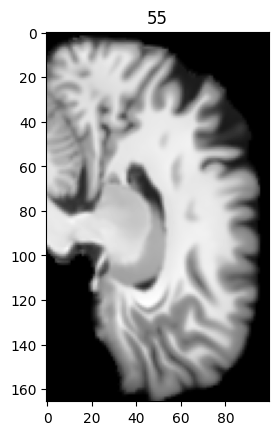

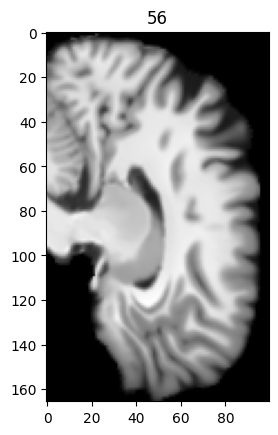

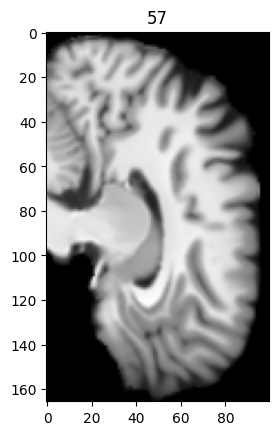

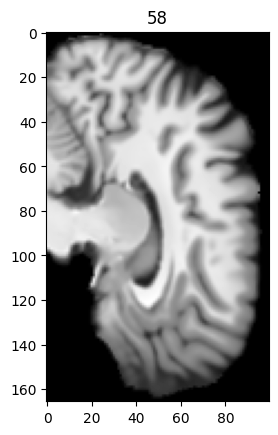

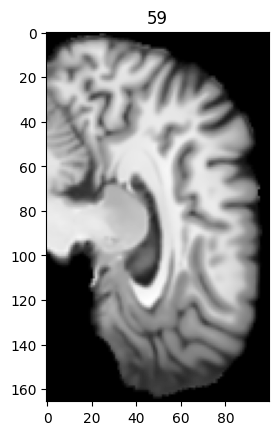

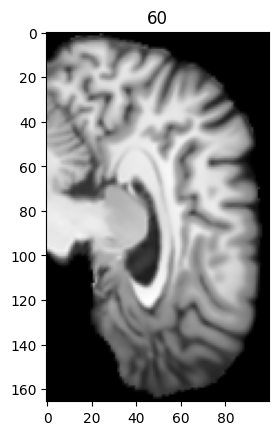

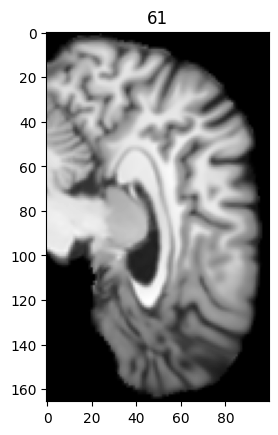

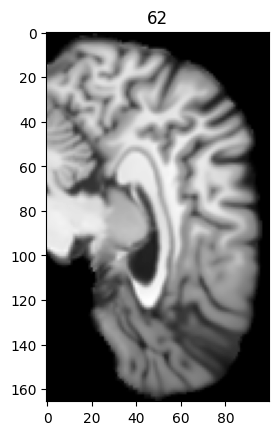

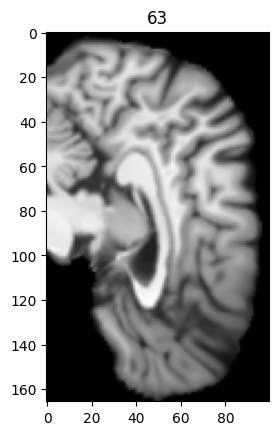

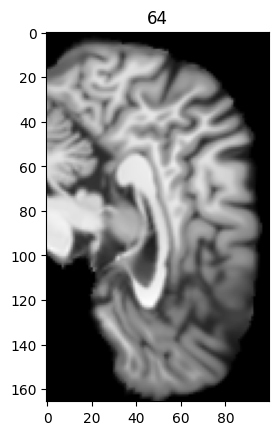

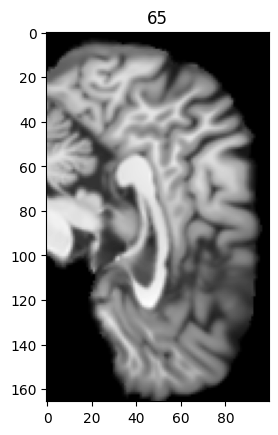

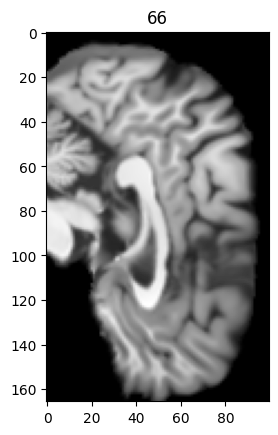

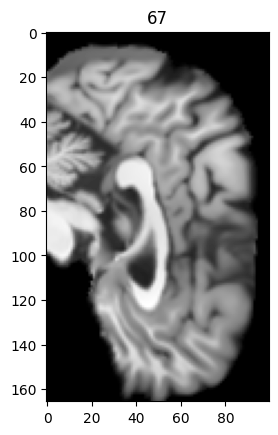

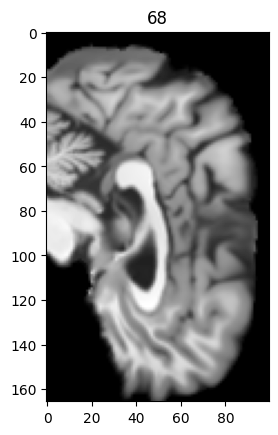

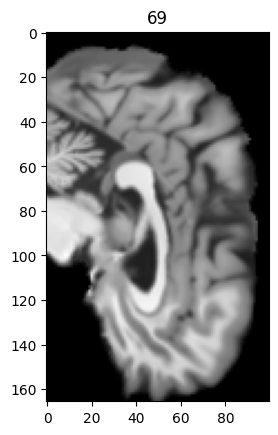

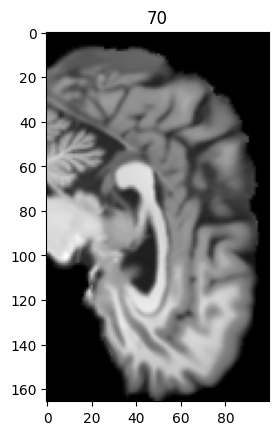

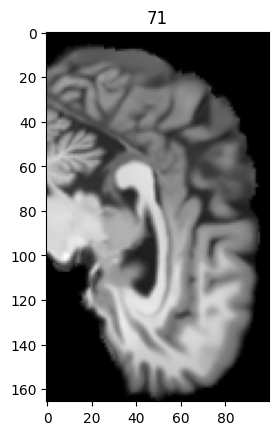

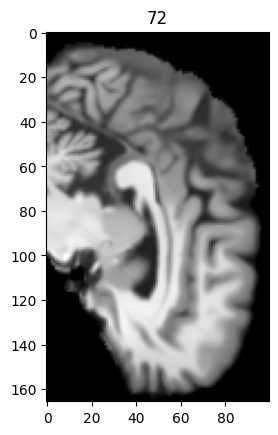

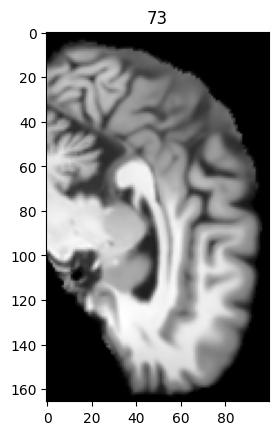

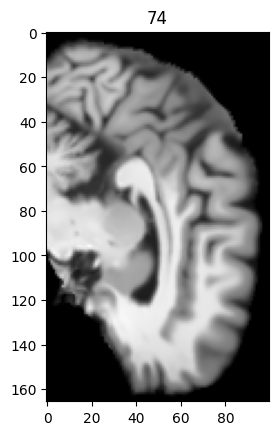

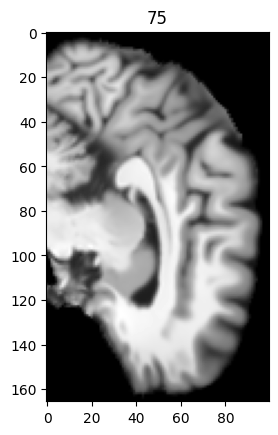

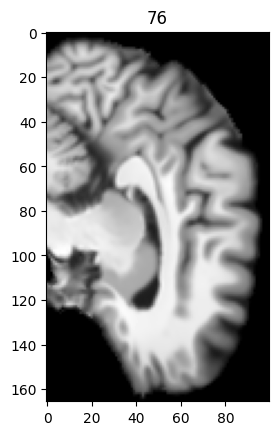

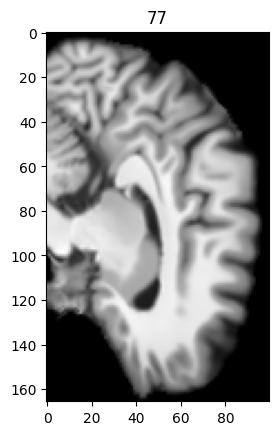

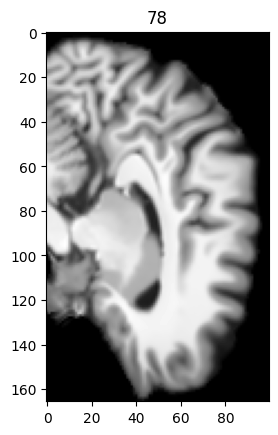

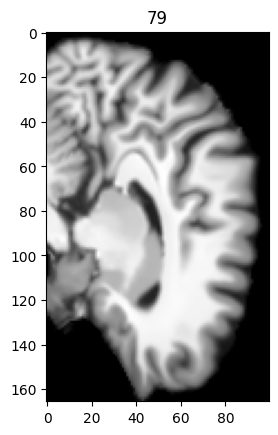

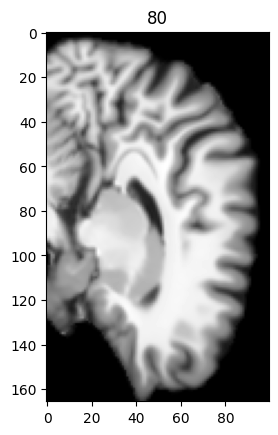

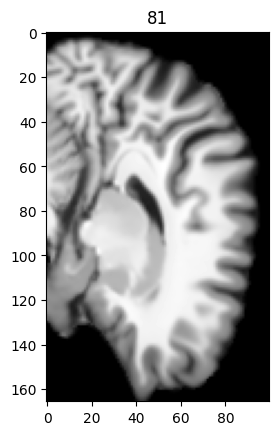

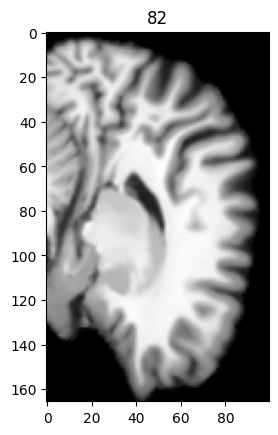

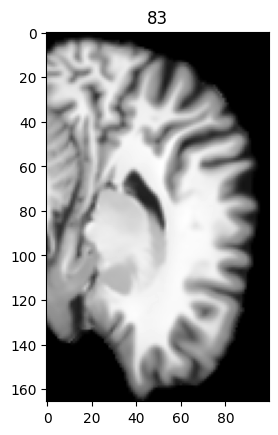

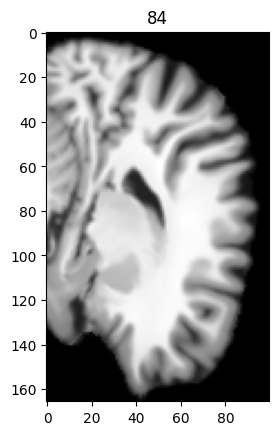

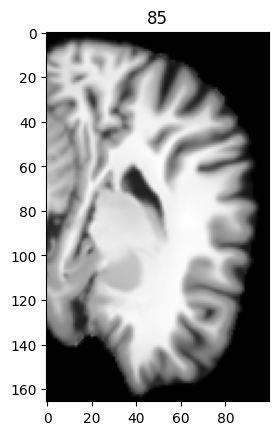

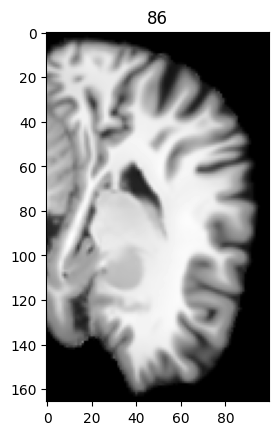

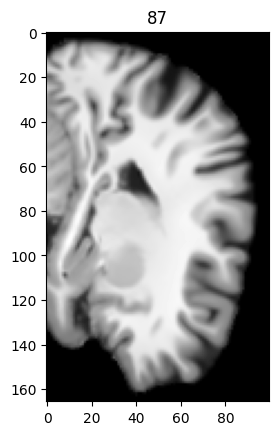

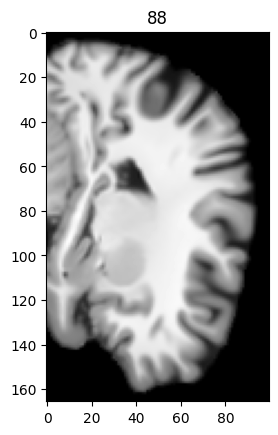

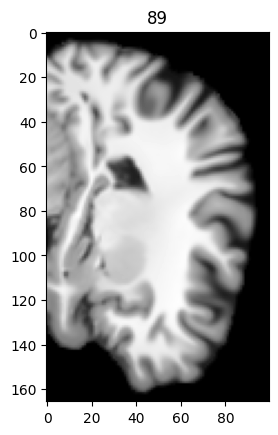

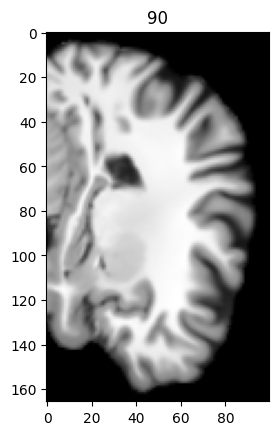

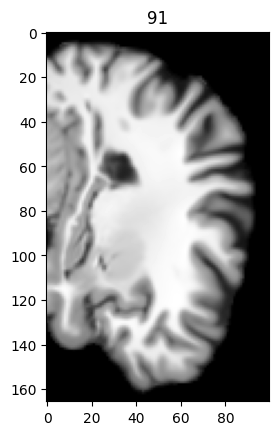

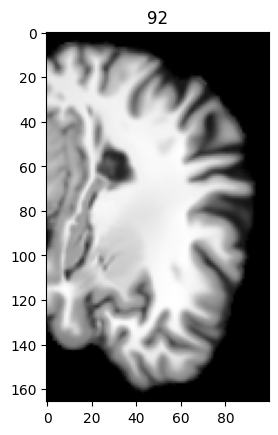

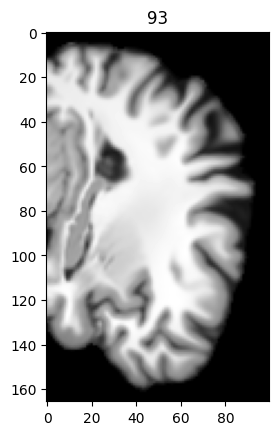

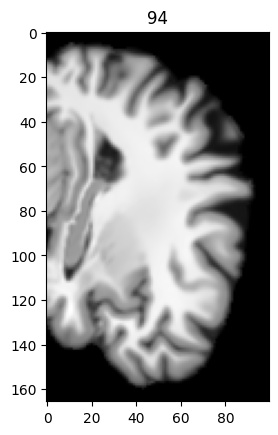

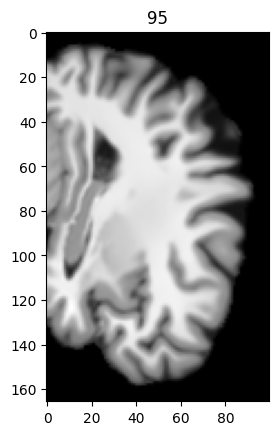

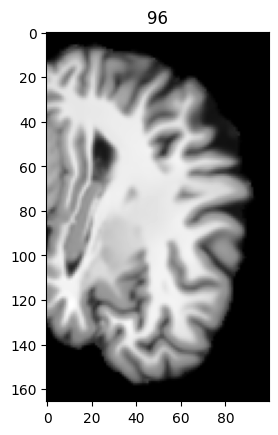

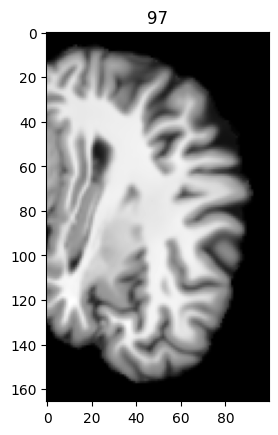

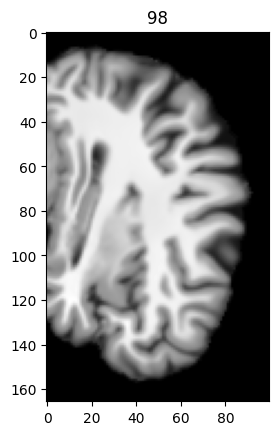

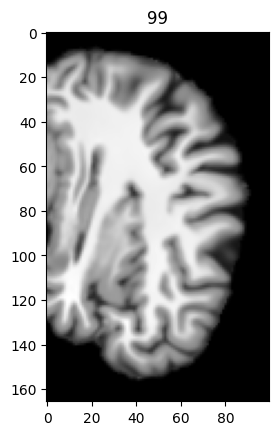

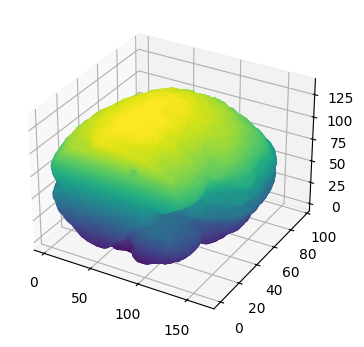

In [4]:
# Optional Debug Functions
view_sagittal_slices(output_brain_volume) #View all sagittal slices, long output
show_3D_array(output_brain_volume) #View the dataset in 3D, might take a sec

Next, we save the brain volume as a `numpy` array to be opened in Blender. This is where we will convert it to a VDB (later, once we build a docker container, this will all be done here)

In [5]:
#Save to output folder
np.save("{}/brain_volume.npy".format(output_folder), output_brain_volume)